# Correlation for C02 & others

This script analyzes the relationship between global CO₂ emissions, temperature, energy consumption, and land-use change using correlation methods.

- Loads the merged dataset and filters for World-level data (post-1965).
- Selects key variables:
    - co2: Total CO₂ emissions
    - global_temp_c: Global mean temperature
    - primary_energy_consumption_twh: Energy use
    - land_use_change_co2: CO₂ from land-use changes
- Computes Pearson correlation matrix to measure linear relationships.

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
import numpy as np

In [2]:
# File Path
BASE_DIR = Path().resolve().parents[1]
file_PATH = BASE_DIR / "data" / "final" / "whole_data_merged.csv"

# Load the merged dataset
df = pd.read_csv(file_PATH)

# Filter for World data with temperature available
df_world = df[(df["country"].str.upper() == "WORLD") & (df["year"] >= 1965)]
# df_world = df_world.dropna(subset=["global_temp_c"])

In [ ]:
cols_of_interest = [
    "co2", "global_temp_c", 
    "primary_energy_consumption_twh", "land_use_change_co2"
]

df_corr_data = df_world[cols_of_interest].dropna()

# Pearson Correlation Matrix
pearson_corr = df_corr_data.corr(method="pearson")

Correlation-ready rows: 59


In [ ]:
# Extract correlations of interest
def extract_target_corr(matrix, target):
    return matrix.loc[[target]].drop(columns=[target]).T.rename(columns={target: f"{target}_correlation"})

co2_vs_all_pearson = extract_target_corr(pearson_corr, "co2")
temp_vs_all_pearson = extract_target_corr(pearson_corr, "global_temp_c")

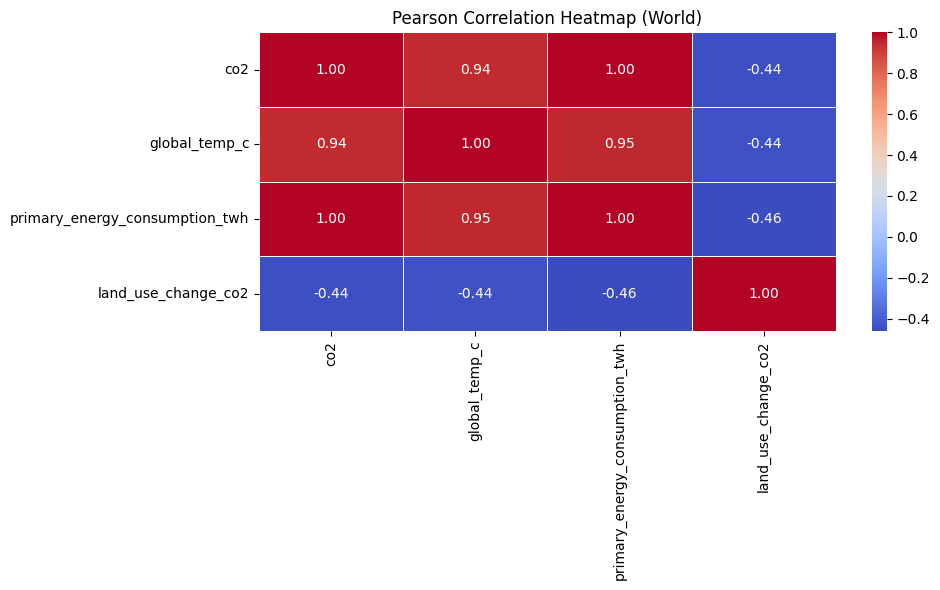

In [7]:
# Heatmap of Pearson Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap (World)")
plt.tight_layout()
plt.show()